NOMES: Gabriele Martins Pereira e Vinícius Santos de Souza.

O conjunto de dados escolhido mostra características de vinhos diferentes, e a variável escohida para o modelo é a qualidade (medida de 0 a 10). As características são descritas abaixo:
A Acidez Fixa é a soma dos ácidos fixos. Tartárico e Málico são os mais importantes. Por princípio, quanto mais elevada for a acidez fixa, mais baixa é a volátil. As bactérias acéticas têm dificuldade em desenvolver-se em meios mais ácidos.
A Acidez Volátil é a soma dos ácidos voláteis, que se libertam pode ebulição ou destilação do vinho e traduz o nível de ataque aceto bacteriano ao vinho. Por lei não pode ultrapassar o valor de 1,2 gr. de ácido acético por litro. O ÁCIDO CÍTRICO é um ácido orgânico forte, normalmente presente em fracas quantidades nos mostos de uva e geralmente ausente nos vinhos. A sua concentração aumenta ligeiramente durante a fermentação alcoólica sendo posteriormente consumido durante a fermentação malo-láctica. Em Enologia é utilizado para reequilibrar a acidez dos vinhos com o propósito de os estabilizar contra uma eventual casse férrica. A adição de ÁCIDO CÍTRICO diminui os riscos de cristalizações tartáricas pois o sal formado é solúvel ao contrário do Bitartarato de Potássio. O ÁCIDO CÍTRICO é degradável pela grande maioria das bactérias lácticas do vinho.
O açúcar é o alimento das leveduras que o transformam em álcool durante o processo de fermentação. E o que sobra no vinho chamamos de residual. A quantidade de álcool é determinada pela quantidade de açúcar no mosto. O enólogo decide que estilo de vinho ele quer produzir na hora da colheita (testa o nível de açúcar das uvas e as colhe no momento que estejam com o grau desejado). As uvas têm dois principais tipos de açúcares, a glicose e a frutose (duas vezes mais doce que a glicose). As duas podem sobrar na bebida e serão chamadas de açúcar residual, se restar mais frutose nesse residual o vinho terá a sensação de maior dulçor.
Os cloretos são sais derivados do ácido clorídrico. Estes podem dividir-se em dois grupos: cloretos minerais ou metálicos, isto é, combinação de cloro com elementos metálicos, mais ou menos polares, e cloretos orgânicos não polares, isto é, que não contêm o halogéneo sob a forma iónica.
A densidade determina a quantidade de massa presente em um determinado volume. Tal conceito, embora simples, é de extrema importância para a Química. Por meio dela, é possível determinar propriedades da matéria, como o raio atômico dos metais, além de poder ser utilizada no controle de qualidade de diversas substâncias. A densidade também é muito utilizada para determinar se um objeto flutuará em outro ou não. Por ser uma grandeza que depende da massa e do volume, acaba sendo afetada pela composição da substância, temperatura e pressão.
A sigla pH é utilizada para representar o potencial hidrogeniônico presente em uma determinada solução ou mistura. Esse potencial refere-se à quantidade (concentração molar ou molaridade) de cátions hidrônio (H+ ou H3O+) presentes no meio e indica se esse meio, ou mistura, é ácido, básico ou neutro. De acordo com o estudo do equilíbrio iônico da água, além dos cátions hidrônio, temos também a presença de íons hidróxido (OH-). Assim, a avaliação do pH de um meio sempre leva em consideração a concentração de hidrônios (cátions) e a de hidróxidos (ânions).
Os sulfatos são espécies químicas iônicas, de valência ou estado de oxidação 2-, que se originam a partir do ácido sulfúrico, tratando-se de um átomo de enxofre central ligado a quatro átomos de oxigênio por meio de ligações covalentes, de fórmula molecular SO42-. Dessa forma, o mais conhecido ácido do íon sulfato é o ácido sulfúrico (H2SO4), sendo também utilizada a denominação de óxido sulfúrico para os sulfatos. Apresentam importância que vai desde o laboratório, passa pela indústria e chega aos sistemas vivos.
Os álcoois são compostos orgânicos caracterizados pela presença de um grupo hidroxila (OH) ligado a um carbono saturado,Portanto, todas as substâncias que apresentam esse grupo funcional em sua estrutura podem corretamente ser identificadas como álcoois. O álcool comum, presente nas bebidas alcoólicas e usado como combustível, em perfumes, tintas, vernizes, solventes e em soluções desinfetantes, é o que tem como principal agente o etanol, sendo, por isso, também chamado de álcool etílico.
O dataset foi tirado do site: https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

Bibliotecas Importadas:

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib as plt
import seaborn as sns

Abrindo os dados:

In [2]:
dados=pd.read_csv('WineQT.csv')

print(dados.shape)

print(dados.head())

print(dados.info())

dados.drop(['free sulfur dioxide', 'total sulfur dioxide'], axis=1, inplace=True)

(1143, 13)
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4        5   0  
1      9.8        5   1

Separando os conjuntos de treinamento e teste:

In [3]:
X=dados.drop('quality', axis=1)
Y=dados.quality.astype(str)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=35, stratify=Y)

Encontrando Y predito:

In [5]:
reg_all=LinearRegression()
reg_all.fit(X_train,Y_train)

y_pred = reg_all.predict(X_test)

Utilizando scatterplot para análise dos dados:

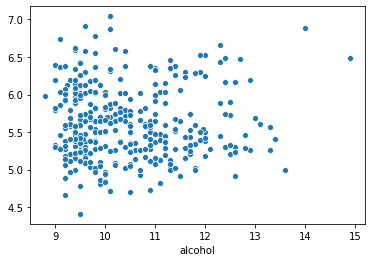

In [7]:
x_alcohol=X_train['alcohol']
x_alcohol=x_alcohol[0:343]

sns.scatterplot(x_alcohol, y_pred, data=dados)

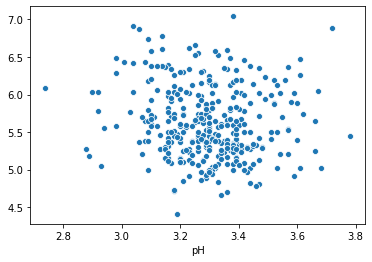

In [10]:
x_pH=X_train['pH']
x_pH=x_pH[0:343]

sns.scatterplot(x_pH, y_pred, data=dados)

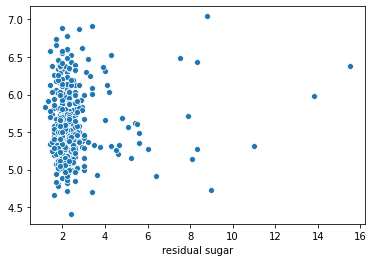

In [12]:
x_residual_sugar=X_train['residual sugar']
x_residual_sugar=x_residual_sugar[0:343]

sns.scatterplot(x_residual_sugar, y_pred, data=dados)

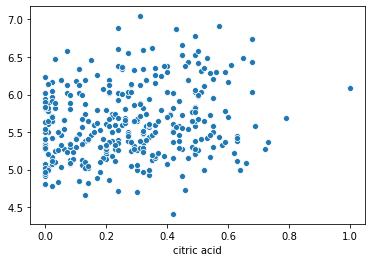

In [13]:
x_citric_acid=X_train['citric acid']
x_citric_acid=x_citric_acid[0:343]

sns.scatterplot(x_citric_acid, y_pred, data=dados)

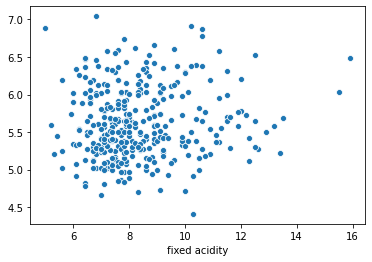

In [15]:
x_fixed_acid=X_train['fixed acidity']
x_fixed_acid=x_fixed_acid[0:343]

sns.scatterplot(x_fixed_acid, y_pred, data=dados)